# Summer Challenge on Automatic Assessment of "True/False" Questions on Handwritten Answer Sheet, under NCVPRIPG'24

**NCVPRIPG'24: [Link](https://ncvpripg2024.github.io/)** <br>
**Challenge Website: [Link](https://vl2g.github.io/challenges/AutoEval2024/#task)**

### OCR with EasyOCR [(Link)](https://github.com/JaidedAI/EasyOCR)

**Install EasyOCR**

In [ ]:
# Installing the easyocr --> It will always ask for the restart of the run-time. Thus, install it at the very begining
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

**Load the Libraries**

In [ ]:
import os
import shutil
import cv2

import matplotlib.pyplot as plt

import PIL.Image
from PIL import Image

**User Input: Upload the image**

In [ ]:
from google.colab import files

image_path = "/content/sample_image.jpg"

if os.path.exists(image_path) == True:
  !rm sample_image.jpg

uploaded_image = files.upload()

img = list(uploaded_image.keys())
given_img_lbl = str(img[0])
img1 = 'sample_image.jpg'

old_name = '/content/'+ given_img_lbl
new_name = "/content/" + img1
os.rename(old_name, new_name)

img2 = '/content/'+img1
print("Image path: ",img2)

Saving Image_20240420_212644_804.jpeg to Image_20240420_212644_804.jpeg
Image path:  /content/sample_image.jpg


**Visualize the uploaded image**

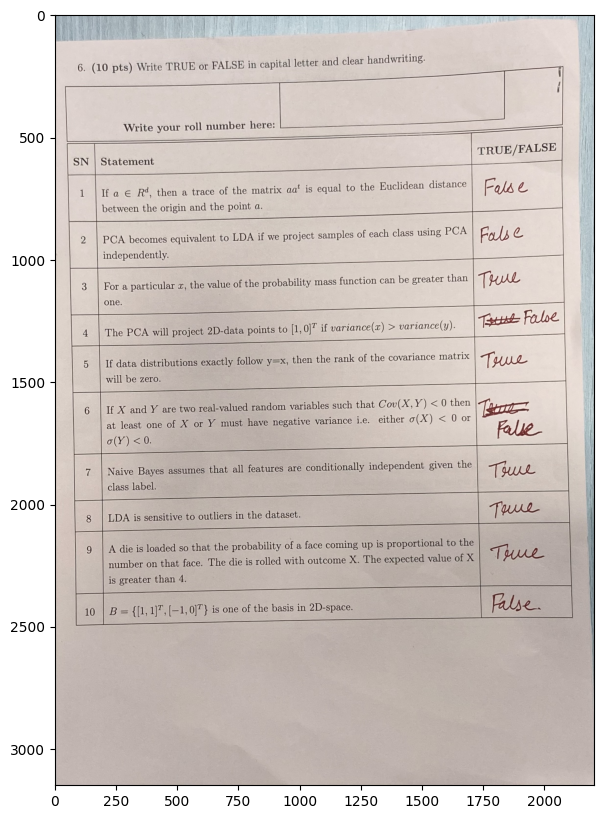

In [ ]:
sample_image = cv2.imread(img2)
plt.figure(figsize = (15,10))
plt.imshow(sample_image);

**Import EasyOCR libraries**

In [ ]:
import shutil
import PIL.Image

import easyocr
from pylab import rcParams
from IPython.display import Image

In [ ]:
# Set the EasyOCR -> Take help of GPUs to make it faster
reader = easyocr.Reader(['en'],gpu = True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
# Extarct the text from EasyOCR --> This will give several outputs like text and bounding boxes
image = cv2.imread(img2)
res = reader.readtext(img2)

**Save the extracted text**

In [ ]:
all_text = []

for i in range(len(res)):
  text = res[i][1]
  all_text.append(text)

all_text_Str = ' '.join(map(str, all_text))
out_path = '/content/EasyOCR_Output_Text.txt'

with open(out_path, 'w', encoding='utf8') as file:
  file.write(all_text_Str)

**Plot the Bounding Boxes (BB) from EasyOCR**

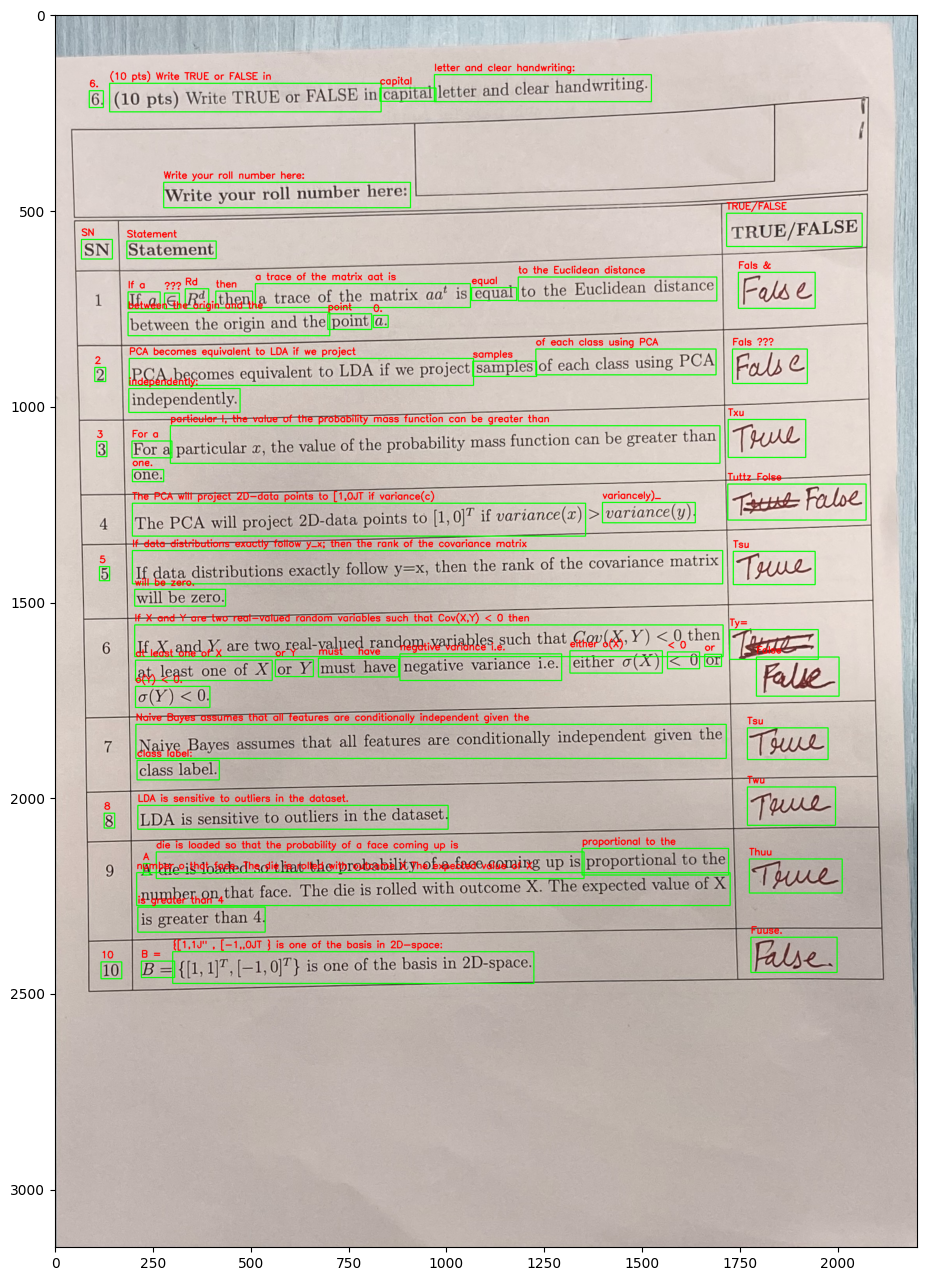

In [ ]:
for (bbox, text, prob) in res:
  # unpack the bounding box
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  cv2.rectangle(image, tl, br, (0, 255, 0), 2)
  cv2.putText(image, text, (tl[0], tl[1] - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
plt.rcParams['figure.figsize'] = (16,16)
plt.imshow(image);